In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random as rd
import statistics as st
from scipy.optimize import curve_fit
from math import factorial
import scipy.stats as stats
import seaborn as sns
import copy
import matplotlib.colors as colors

import time

import pandas as pd
import matplotlib.pyplot as plt

creazione del grafo

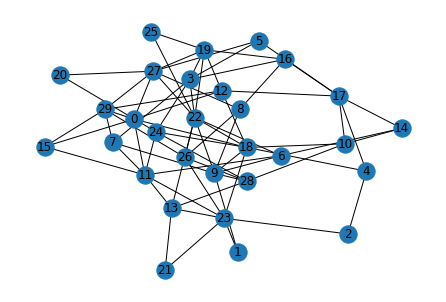

In [2]:
N=30
P=0.15

# G = nx.complete_graph(N)
# G.remove_edges_from([(0, 3), (2, 4)])

G = nx.erdos_renyi_graph(N, P)
while min([d for n, d in G.degree()]) < 1:
    G = nx.erdos_renyi_graph(N, P)

nodes = sorted([int(n) for n in G.nodes])
nx.draw(G, with_labels=True)    

analisi spettrale del grafo iniziale

In [3]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)]

for a, b in adjacency :
    a = int(a)
    for c in b :
        c = int(c)
        A[a][c] = 1
print(A)

k_0 = [sum(A[n]) for n in range(N)]

#matrice stocastica e calcolo autovettori e autovalori        
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a] 
        
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)

diff = [np.abs(autovaloriP[i] - 1) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriP[i] - 1) == minDiff:
        pS = autovettoriP[i]
        print("Eigenvector found")
        break

if pS[0] < 0:
    pS = -pS
    
pS = pS.real

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
matrixL = np.identity(N) - matrixP

autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)

diff = [np.abs(autovaloriL[i]) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriL[i]) == minDiff:
        pS_L = autovettoriL[i]
        FiedlerEigenvalues = list(autovaloriL)
        FiedlerEigenvalues.remove(autovaloriL[i])
        print("Eigenvector found")
        break

if pS_L[0] < 0:
    pS_L = -pS_L

pSNorm = [h/sum(pS) for h in pS]

Eigenvector found


random walk iniziale

In [5]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[int(new_node)] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[int(n)]
    history += [evolution]

In [6]:
walker_per_node = 2500
time_steps = int(50)

long_history = [[]]
for h in range(len(long_history)):
    long_history[h] = [[walker_per_node] * len(G.nodes)]

In [7]:
t0 = time.time()

for h in range(len(long_history)):
    for n in G.nodes:
        G.nodes[n]['N_i'] = walker_per_node
    
    for t in range(time_steps):
        dynamic_evolution(G, long_history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 38.853079080581665 seconds


Rimozione di un link

In [8]:
len(G[0])

6

[[27, 22], [25, 19], [21, 23], [19, 22], [18, 4], [19, 27], [26, 23], [24, 20], [11, 7], [27, 5]]


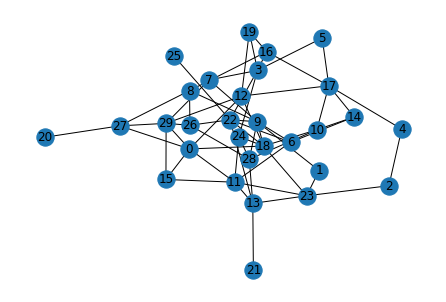

In [9]:
links = []
for r in range(10):
    links += [list(_random_subset(G.nodes, 2, seed))]
    while links[r] not in G.edges or len(G[links[r][0]]) == 1 or len(G[links[r][1]]) == 1:
        links[r] = list(_random_subset(G.nodes, 2, seed))
    G.remove_edge(links[r][0], links[r][1])

print(links)

nx.draw(G, with_labels=True)

In [10]:
adjacency_r = list(G.adjacency())
A_r = []
for a, b in adjacency_r :
    A_r += [[0]*len(adjacency_r)]

for a, b in adjacency_r :
    a = int(a)
    for c in b :
        c = int(c)
        A_r[a][c] = 1
print(A_r)

k_r = [sum(A_r[n]) for n in range(N)]
print(k_r)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
# matrice stocastica e calcolo autovettori e autovalori        
P_r = []
for a, b in adjacency_r :
    P_r += [[0]*len(adjacency_r)]
    for c in b: 
        P_r[a][c] = 1./G.degree[a] 
        
matrixP_r = np.array(P_r)
autovaloriP_r, autovettoriP_r = np.linalg.eig(np.transpose(matrixP_r))
autovettoriP_r = np.transpose(autovettoriP_r)

diff = [np.abs(autovaloriP_r[i] - 1) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriP_r[i] - 1) == minDiff:
        pS_r = autovettoriP_r[i].real
        print("Eigenvector found")
        break

if pS_r[0] < 0:
    pS_r = -pS_r

Eigenvector found


In [12]:
matrixL_r = np.identity(N) - matrixP_r

autovaloriL_r, autovettoriL_r = np.linalg.eig(np.transpose(matrixL_r))
autovettoriL_r = np.transpose(autovettoriL_r)

diff = [np.abs(autovaloriL_r[i]) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriL_r[i]) == minDiff:
        pS_L_r = autovettoriL_r[i]
        FiedlerEigenvalues_r = list(autovaloriL)
        FiedlerEigenvalues_r.remove(autovaloriL[i])
        print("Eigenvector found")
        break

if pS_L_r[0] < 0:
    pS_L_r = -pS_L_r

pSNorm_r = [h/sum(pS_r) for h in pS_r]

Eigenvector found


dinamica non ottimizzata dopo la rottura

In [13]:
t0 = time.time()

for h in range(len(long_history)):    
    for t in range(time_steps):
        dynamic_evolution(G, long_history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 38.75004601478577 seconds


dinamica ottimizzata - metropolis

In [14]:
import copy

seed = np.random.RandomState()
def dynamic_evolution_metropolis(G, history = []):
    evolution = [0] * len(G.nodes)
    P_f = copy.deepcopy(A_r)
    
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            
            f_i = k_0[n]/k_r[n]
            #f_j = [k_0[n]/k_r[n] for n in neighbours]
            #p_ij = [min(1,f_j[n]/f_i) for n in neighbours]
            
            new_node = _random_subset(neighbours, 1, seed).pop()
            f_j = k_0[new_node]/k_r[new_node]
            
            p_ij = min(1,f_j/f_i)
            P_f[n][new_node] = p_ij / len(neighbours)
            if rd.random() <= p_ij:
                evolution[int(new_node)] += 1  
            else:
                evolution[n] += 1
            
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[int(n)]
    history += [evolution]
    
    return P_f

dinamica ottimizzata

In [15]:
t0 = time.time()

for h in range(len(long_history)):    
    for t in range(time_steps):
        P_f = dynamic_evolution_metropolis(G, long_history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 41.60565781593323 seconds


In [16]:
norm = max([sum(P_f[i]) for i in range(N)])
for i in range(N):
    P_f[i][i] = norm - sum(P_f[i])

In [17]:
print([sum(P_f[i]) for i in range(N)])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0]


In [18]:
matrixP_f = np.array(P_f)

matrixL_f = norm*np.identity(N) - matrixP_f

autovaloriL_f, autovettoriL_f = np.linalg.eig(np.transpose(matrixL_f))
autovettoriL_f = np.transpose(autovettoriL_f)
print('autovalori di L_f:', autovaloriL_f)

minDiff = min([np.abs(autovaloriL_f[i]) for i in range(N)])
for i in range(N):
    if np.abs(autovaloriL_f[i]) == minDiff:
        pS_f = autovettoriL_f[i]
        print("Eigenvector found")
        break

if pS_f[0] < 0:
    pS_f = -pS_f

pS_f = pS_f.real
    
pSNorm_f = [h/sum(abs(pS_f)) for h in pS_f]

autovalori di L_f: [4.44089210e-16 1.66381643e+00 1.57048913e+00 1.49985892e+00
 1.48144699e+00 1.41086615e+00 1.35587745e+00 1.33827314e+00
 1.31665281e+00 1.23791936e+00 1.21741034e+00 1.15119338e+00
 1.08197271e+00 1.03431816e+00 1.02125432e+00 1.98877927e-01
 2.32017447e-01 2.85918438e-01 9.06260001e-01 8.53218065e-01
 8.14453154e-01 3.63886368e-01 3.98538382e-01 4.35479704e-01
 5.03112677e-01 5.25756729e-01 5.52030128e-01 6.19822242e-01
 6.84024589e-01 6.81932856e-01]
Eigenvector found


In [19]:
pSNorm_f

[0.042253521126760625,
 0.014084507042253516,
 0.01408450704225362,
 0.04225352112676056,
 0.021126760563380306,
 0.021126760563380288,
 0.02816901408450697,
 0.028169014084506973,
 0.028169014084507095,
 0.049295774647887355,
 0.028169014084507192,
 0.049295774647887314,
 0.035211267605633874,
 0.03521126760563382,
 0.02112676056338019,
 0.021126760563380257,
 0.028169014084507032,
 0.04225352112676056,
 0.05633802816901404,
 0.04225352112676053,
 0.014084507042253492,
 0.01408450704225351,
 0.06338028169014102,
 0.0492957746478873,
 0.035211267605633804,
 0.014084507042253511,
 0.035211267605633804,
 0.04929577464788726,
 0.035211267605633784,
 0.042253521126760646]

In [20]:
pSNorm

[0.042253521126760694,
 0.014084507042253482,
 0.014084507042253462,
 0.04225352112676055,
 0.021126760563380236,
 0.0211267605633803,
 0.028169014084507053,
 0.028169014084507078,
 0.02816901408450702,
 0.04929577464788731,
 0.02816901408450704,
 0.04929577464788731,
 0.035211267605633846,
 0.035211267605633825,
 0.02112676056338028,
 0.021126760563380323,
 0.028169014084507046,
 0.04225352112676054,
 0.05633802816901392,
 0.04225352112676059,
 0.014084507042253528,
 0.014084507042253482,
 0.06338028169014098,
 0.04929577464788727,
 0.0352112676056338,
 0.014084507042253504,
 0.035211267605633784,
 0.049295774647887335,
 0.035211267605633804,
 0.04225352112676055]

IndexError: list index out of range

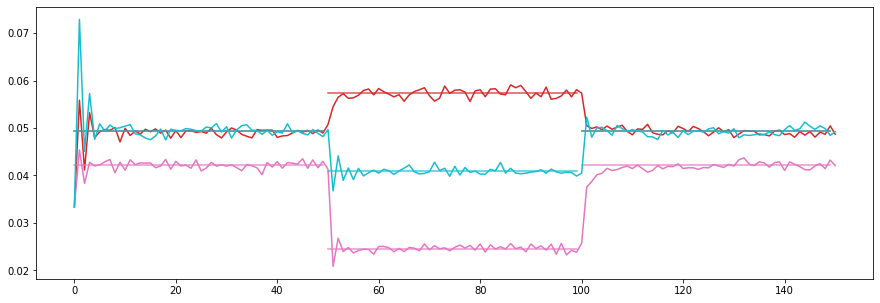

In [42]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 5))
node = []
# color = list(mcolors.CSS4_COLORS)
color = list(mcolors.TABLEAU_COLORS)

for n in G.nodes:
    if abs(pSNorm_r[n] - pSNorm[n]) > 0.008:
        node += [n]

time_range = long_history[0]
index = np.arange(0, len(time_range), 1)
index1 = np.arange(0, time_steps, 1)
index2 = np.arange(time_steps, 2*time_steps, 1)
index3 = np.arange(2*time_steps, 3*time_steps, 1)

col = 0
for i in node:
    ax.plot(index, [time_range[ind][i]/walker_per_node/N for ind in index],
            label = f"Node {i}",
            color = color[col])
    ax.plot(index1, [pSNorm[i]]*len(index1),
            color = color[col], alpha = 0.8)
    ax.plot(index2, [pSNorm_r[i]]*len(index2),
            color = color[col], alpha = 0.8)
    ax.plot(index3, [pSNorm_f[i]]*len(index2),
            color = color[col], alpha = 0.8)
    col += 1
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Density of walkers per node")
ax.set_title("Dinamica su network perturbato")

ax.legend()

plt.show()

In [37]:
diff = [abs(pSNorm_f[i] - pSNorm[i]) for i in range(N)]
sum(diff)

1.5959455978986625e-15